# 📊 Customer Churn Prediction

This project aims to predict customer churn using machine learning techniques based on user behavior and service-related data. It covers the full workflow from data preprocessing to model evaluation and hyperparameter tuning.


🔧 **Project Workflow**

1. **Exploratory Data Analysis (EDA)**
   
Inspected data shape, types, and unique value counts

Checked for missing values and class imbalance

Correlation analysis using .corr() to understand feature relationships

2. **Data Preprocessing**
   
Combined train and test data for uniform preprocessing

Applied Label Encoding for ordinal categorical features

Applied One-Hot Encoding for nominal categorical features

Scaled features using StandardScaler for numerical consistency

3. **Feature Engineering**
   
Dropped less relevant features like CustomerID

Assessed feature correlation with the target variable Churn

4. **Model Building**
   
Trained a Logistic Regression model using scaled training data

Handled class imbalance with class_weight='balanced'

5. **Model Evaluation**
   
Evaluated model using:

Confusion matrix

Accuracy, Precision, Recall, F1-score

Interpreted TP, TN, FP, FN to understand prediction quality

6. **Hyperparameter Tuning**
   
Used GridSearchCV with 5-fold cross-validation

Tuned C, penalty, solver, and class_weight

Selected best model based on F1 score

✅ **Final Output**

Best model parameters identified via GridSearchCV

Validation performance evaluated using F1-score and confusion matrix

Model ready for prediction on test data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
train_data = pd.read_csv('train.csv')

train_data.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In [5]:
test_data = pd.read_csv('test.csv')

test_data.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR
5,5,19.037169,95.185843,Basic,Electronic check,Yes,Movies,Yes,Tablet,35.058340,62.351472,1,Comedy,1.695250,1,Male,6,Yes,No,7A88BB5IO6
6,103,9.135067,940.911867,Standard,Credit card,No,Both,Yes,Computer,6.237829,120.736176,9,Sci-Fi,3.912529,4,Male,22,Yes,No,70OMW9XEWR
7,22,7.069956,155.539038,Basic,Electronic check,No,Both,Yes,Computer,6.372862,111.135950,35,Fantasy,2.488022,9,Female,7,No,No,EL1RMFMPYL
8,21,6.615587,138.927320,Standard,Electronic check,Yes,Both,Yes,Mobile,18.564468,37.712931,44,Fantasy,3.425709,5,Female,8,No,Yes,4IA2QPT6ZK
9,86,11.439289,983.778885,Standard,Credit card,Yes,Movies,No,Tablet,27.467128,17.324508,19,Sci-Fi,1.772171,9,Male,3,No,No,AEDCWHSJDN


In [6]:
train_data.shape

(243787, 21)

In [7]:
test_data.shape

(104480, 20)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                104480 non-null  f

In [10]:
train_data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [11]:
test_data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
count,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000,104480.000000
mean,60.064692,12.474347,748.167669,20.489914,92.646128,24.450900,3.000958,4.507705,12.040400
std,34.285025,4.331734,520.782838,11.243173,50.631406,14.451309,1.154689,2.876700,7.204115
min,1.000000,4.990051,5.019144,1.000528,5.000985,0.000000,1.000016,0.000000,0.000000
25%,30.000000,8.725621,328.961543,10.767551,48.554662,12.000000,2.000577,2.000000,6.000000
50%,60.000000,12.453073,649.385029,20.472305,92.533168,25.000000,2.997293,5.000000,12.000000
75%,90.000000,16.214247,1081.266991,30.196107,136.622615,37.000000,4.000671,7.000000,18.000000
max,119.000000,19.989797,2376.235183,39.999296,179.999785,49.000000,4.999930,9.000000,24.000000


In [12]:
train_data.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [13]:
test_data.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64

In [14]:
train_data['Churn'].value_counts()

Churn
0    199605
1     44182
Name: count, dtype: int64

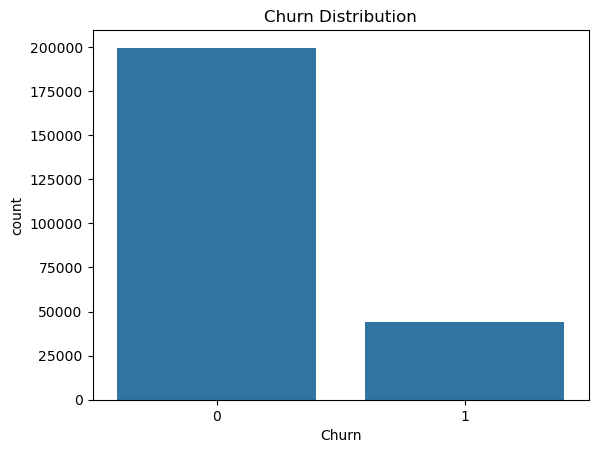

In [15]:
sns.countplot(x = 'Churn', data = train_data)
plt.title('Churn Distribution')
plt.show()

In [16]:
train_data.corr(numeric_only = True)['Churn'].sort_values(ascending = False) #It calculates Pearson correlation between all numerical columns and the target column Churn

Churn                       1.000000
MonthlyCharges              0.100473
SupportTicketsPerMonth      0.084064
UserRating                  0.022124
WatchlistSize               0.021739
TotalCharges               -0.120529
ViewingHoursPerWeek        -0.128645
ContentDownloadsPerMonth   -0.129752
AverageViewingDuration     -0.146897
AccountAge                 -0.197736
Name: Churn, dtype: float64

In [17]:

# Combine Train and Test for Uniform Preprocessing

test_data['Churn'] = np.nan

combined = pd.concat([train_data, test_data], ignore_index = True)

In [18]:
combined

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0.0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0.0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0.0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0.0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348262,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,...,35,Comedy,1.411831,7,Female,14,No,Yes,UTKREC613O,NaN
348263,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,...,17,Drama,2.783849,2,Male,8,Yes,No,MDB4E477PS,NaN
348264,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,...,31,Comedy,2.991527,1,Male,12,No,Yes,IPDIA02ZE1,NaN
348265,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,...,1,Drama,4.998019,0,Female,12,Yes,No,ITLFTPRJGV,NaN


In [19]:
combined.isnull().sum()

AccountAge                       0
MonthlyCharges                   0
TotalCharges                     0
SubscriptionType                 0
PaymentMethod                    0
PaperlessBilling                 0
ContentType                      0
MultiDeviceAccess                0
DeviceRegistered                 0
ViewingHoursPerWeek              0
AverageViewingDuration           0
ContentDownloadsPerMonth         0
GenrePreference                  0
UserRating                       0
SupportTicketsPerMonth           0
Gender                           0
WatchlistSize                    0
ParentalControl                  0
SubtitlesEnabled                 0
CustomerID                       0
Churn                       104480
dtype: int64

The newly added churn column in test_data is null.

In [20]:
combined.fillna(method = 'ffill') #Handling null values

C:\Users\Shuchi\AppData\Local\Temp\ipykernel_13772\3791771771.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined.fillna(method = 'ffill') #Handling null values


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0.0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0.0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0.0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0.0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348262,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,...,35,Comedy,1.411831,7,Female,14,No,Yes,UTKREC613O,0.0
348263,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,...,17,Drama,2.783849,2,Male,8,Yes,No,MDB4E477PS,0.0
348264,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,...,31,Comedy,2.991527,1,Male,12,No,Yes,IPDIA02ZE1,0.0
348265,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,...,1,Drama,4.998019,0,Female,12,Yes,No,ITLFTPRJGV,0.0


One-Hot Encoding is a method to convert categorical variables (like "Gender", "Country", "Plan Type") into a format that machine learning algorithms can understand — numeric and binary.

In [21]:
categorical_columns = combined.select_dtypes(include = "object").columns.tolist()

categorical_columns

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'CustomerID']

In [22]:
le = LabelEncoder()

for col in categorical_columns:
    combined[col] = le.fit_transform(combined[col])

In [23]:
combined[col]

0         118956
1         272698
2         138242
3         229183
4          44454
           ...  
348262    297753
348263    216267
348264    180535
348265    181720
348266    329355
Name: CustomerID, Length: 348267, dtype: int32

We combined train and test data only for ease of performing label encoding

In [24]:
#Let's split train and test data

train_data = combined[combined['Churn'].notnull()]

test_data = combined[combined['Churn'].isnull()].drop('Churn', axis = 1)

In [25]:
#Feature/Target Split

X = train_data.drop('Churn', axis = 1)

y = train_data['Churn'].astype(int)

In [26]:
#Train test validation split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [27]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_data)

In [29]:
from sklearn.model_selection import GridSearchCV

#Define parameter for tuning

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

In [30]:
#Model Building- Logistic Regression

model = LogisticRegression(max_iter = 1000)

In [31]:
grid = GridSearchCV(estimator= model, param_grid=param_grid, scoring = 'f1', cv = 5, verbose = 1 )

In [32]:
#Train model
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [33]:
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [34]:
#Model Evaluation

y_pred = best_model.predict(X_val_scaled)

In [35]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [36]:
print("Classification Report: \n", classification_report(y_val, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     39923
           1       0.32      0.69      0.44      8835

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.71     48758



In [37]:
print("Confusion Matrix: \n", confusion_matrix(y_val,y_pred))

Confusion Matrix: 
 [[27020 12903]
 [ 2723  6112]]


In [38]:
#Predict on test data

test_predictions = best_model.predict(test_scaled)

In [39]:
print("Test Predictions: \n" ,test_predictions)

Test Predictions: 
 [0 0 1 ... 0 1 0]


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy = accuracy_score(y_val, y_pred)

In [42]:
print("The accuracy score of the churn prediction model based on Logistic Regression is", accuracy)

The accuracy score of the churn prediction model based on Logistic Regression is 0.6795192583781123


The accuracy is nearly 68% which is low but the model predicts the churn value pretty well.